In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fmin

In [29]:
walkCorrVec = np.transpose(np.loadtxt("output/walkCorrecterVectors.txt"))
qdc_L = walkCorrVec[0]
qdc_R = walkCorrVec[1]
t_diff = walkCorrVec[2]


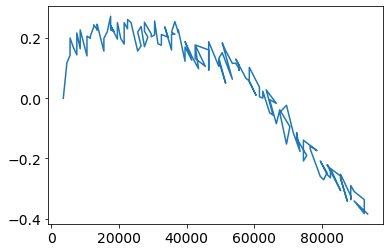

In [30]:
plt.plot(qdc_L, t_diff)

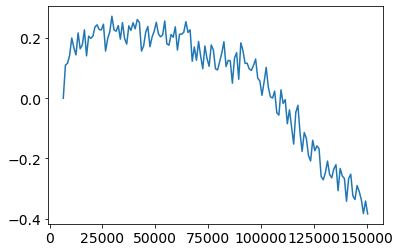

In [31]:
plt.plot(qdc_R, t_diff)


In [32]:
print(qdc_R[-2])
print(qdc_L[-2])
print(t_diff[-2])

149500.0
89500.0
-0.341123


In [33]:
nextIndex = np.argmin(abs(qdc_R-89500.0))
print(qdc_R[nextIndex])
print(qdc_L[nextIndex])
print(t_diff[nextIndex])

89500.0
53500.0
0.0628945


In [34]:
nextIndex = np.argmin(abs(qdc_R-53500))
print(qdc_R[nextIndex])
print(qdc_L[nextIndex])
print(t_diff[nextIndex])

53500.0
30500.0
0.210015


In [35]:
nextIndex = np.argmin(abs(qdc_R-30500))
print(qdc_R[nextIndex])
print(qdc_L[nextIndex])
print(t_diff[nextIndex])

30500.0
17500.0
0.226537


In [36]:
nextIndex = np.argmin(abs(qdc_R-17500))
print(qdc_R[nextIndex])
print(qdc_L[nextIndex])
print(t_diff[nextIndex])

17500.0
10500.0
0.140492


In [37]:
nextIndex = np.argmin(abs(qdc_R-10500))
print(qdc_R[nextIndex])
print(qdc_L[nextIndex])
print(t_diff[nextIndex])

10500.0
5500.0
0.199629


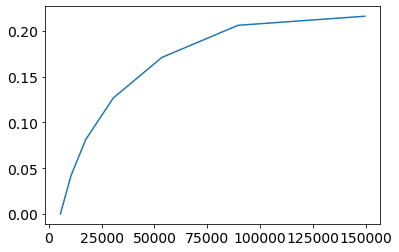

In [38]:
qdc = [5500, 10500.0, 17500.0, 30500.0, 53500.0, 89500.0, 149500.0]
diff = [0, 
        0.0418394, 
        0.0418394+0.0395273,
        0.0418394+0.0395273+0.045303,
        0.0418394+0.0395273+0.045303+0.0443503,
        0.0418394+0.0395273+0.045303+0.0443503+0.0351557,
        0.0418394+0.0395273+0.045303+0.0443503+0.0351557+0.00990333]
plt.plot(qdc,diff)

array([ 2.56191096e-01,  3.48722826e-05, -4.01587332e-02])

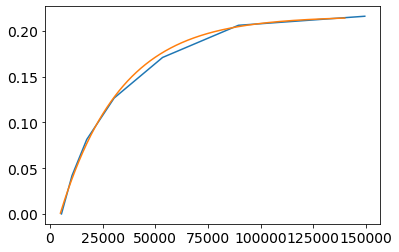

In [39]:
def f(qdc, *par):
    a = par[0]
    b = par[1]
    c = par[2]
    return a*(1-np.exp(-qdc*b)) + c

popt, pcov = curve_fit(f, qdc, diff, p0 = [0.2, 1/80e3, 0])

plt.plot(qdc,diff)
qdcspace = np.linspace(5000,140e3,1000)
plt.plot(qdcspace, f(qdcspace,*popt))
popt

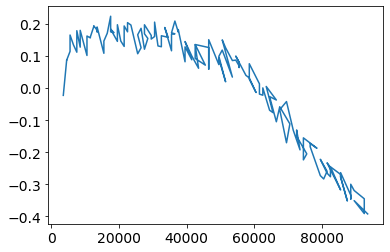

In [40]:
newtdiffs = []

for i in range(len(t_diff)):
    newtdiff = t_diff[i] - f(qdc_R[i],*popt) + f(qdc_L[i],*popt)
    newtdiffs.append(newtdiff)

plt.plot(qdc_L,newtdiffs)

In [57]:
def walk(qdc, *par):
    a = par[0]
    b = par[1]
    c = par[2]
    d = par[3]
    return a*(1-np.exp(-qdc*b)) + c*qdc + d*qdc*qdc
def toMin(par):
    chi2 = 0
    for i in range(len(t_diff)):
        chi2 += (t_diff[i] - (walk(qdc_R[i],*par) - walk(qdc_L[i],*par)) )**2
    print(chi2)
    return chi2

res = fmin(toMin, x0 = [1.45829295e-01,  7.78386807e-05,  1.99495618e-06, -6.78175224e-12], ftol = 1e-10 )
res

4.706684223188102
4.687043851494511
4.72369105251959
4.7617022445111665
4.646247157819615
4.625100924124161
4.564424118945094
4.575372772947117
4.531412142556834
4.450942881604943
4.442598391616453
4.343117878682647
4.33765166573074
4.224769806938363
4.246265058681597
4.116137881862089
3.992598764780153
4.060866792181643
4.023091035729452
3.975588007417485
4.018366399719058
4.076716644416665
4.004968140726745
3.9436979929176537
3.928891483609628
3.897144720138654
3.852715125877087
3.8104443115866133
3.70624081270009
3.8936825073734087
3.7112835022533948
3.5844335665904006
3.3982044671471114
3.4874279529032823
3.2229063712490875
3.0302524098553527
3.246926791199058
3.4564800872345542
4.027197521612692
3.265735699487045
3.593595785517759
3.1355533886359335
3.2746383987191203
3.1361741060088
3.401636545776604
3.1587209268225074
3.061630597729314
3.2630255765747154
3.0950287438103485
3.091394421520376
2.977714467147523
2.9219962433156916
3.007135727479001
2.887369339176881
2.81449206181435

array([ 4.54607603e-01,  7.39852632e-05,  1.53753448e-05, -9.16511175e-11])

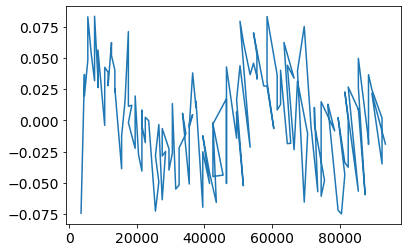

In [53]:
newtdiffs = []

for i in range(len(t_diff)):
    newtdiff = t_diff[i] - walk(qdc_R[i],*res) + walk(qdc_L[i],*res)
    newtdiffs.append(newtdiff)

plt.plot(qdc_L,newtdiffs)

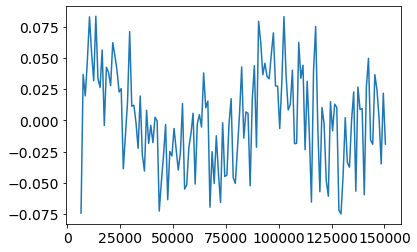

In [54]:
newtdiffs = []

for i in range(len(t_diff)):
    newtdiff = t_diff[i] - walk(qdc_R[i],*res) + walk(qdc_L[i],*res)
    newtdiffs.append(newtdiff)

plt.plot(qdc_R,newtdiffs)

(-1.5, 2.0)

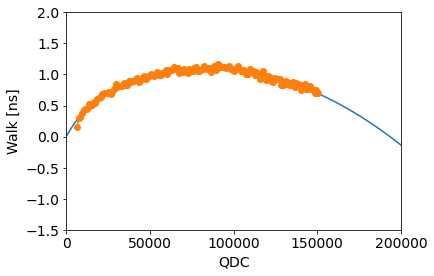

In [63]:
plt.rcParams.update({'font.size': 14})

walkDiv = 1

otherRes = [1.593e-01,  8.371e-05,  1.842e-06, -6.777e-12] 

qdcspace = np.linspace(0,550e3,1000)
plt.plot(qdcspace/walkDiv, walk(qdcspace,*res))
plt.plot(qdc_R/walkDiv,(t_diff+walk(qdc_L,*res)), marker = "o")
#plt.xticks(np.linspace(0,3500,8))
#plt.yticks(np.linspace(-0.20, 1.4,9))
plt.ylabel("Walk [ns]")
plt.xlabel("QDC")
plt.xlim(0,200e3)
plt.ylim(-1.5,2)